# CARTERAS RISK PARITY

**La paridad de riesgo es un enfoque para la gestión de carteras que se enfoca en la asignación de riesgo en lugar de la asignación de capital.**

Las carteras de **paridad de riesgo**, empleadas por Ray Dalio, el fundador de Bridgewater Associates, y ampliamente desarrolladas por Thierry Roncalli, quien ha publicado varios papers y un [libro](http://www.thierry-roncalli.com/RiskParityBook.html) sobre este tema, surgen como una alternativa a las carteras de **media-varianza**. Se enfocan en la asignación equitativa del riesgo entre los componentes del portafolio, en lugar de optimizar basándose en rendimientos esperados y covarianza. Este enfoque presenta varias ventajas:

- **Mayor diversificación:** Promueve una diversificación más efectiva al evitar concentraciones de riesgo.
- **Resiliencia en diversos mercados:** Mejora la capacidad de adaptación a distintos escenarios de mercado, ofreciendo estabilidad.
- **Independencia de las estimaciones de rendimientos:** Reduce la dependencia en predicciones de rendimientos futuros, centrando la atención en el manejo del riesgo.

En definitiva, las carteras de paridad de riesgo, una innovación de Ray Dalio y profundamente explorada por Thierry Roncalli, ofrecen una gestión de inversiones más robusta y equilibrada, mejorando la diversificación y el rendimiento ajustado al riesgo.

Para más información sobre el modelo, se pueden usar las slides de [Palomar](https://palomar.home.ece.ust.hk/ELEC5470_lectures/slides_risk_parity_portfolio.pdf)


Existen dos enfoques principales para construir carteras de **paridad de riesgo**: el enfoque de **mínimos cuadrados (Least Squares)** y el enfoque de **presupuesto de riesgo (Risk Budgeting)**. Cada uno ofrece un método distinto para lograr la asignación equitativa del riesgo entre los componentes de un portafolio.

- **Enfoque de Mínimos Cuadrados:** Este método busca minimizar la diferencia cuadrada entre las contribuciones al riesgo de cada activo y un objetivo de contribución al riesgo predefinido. 

- **Enfoque de Presupuesto de Riesgo:** Bajo este enfoque, se asigna explícitamente un presupuesto de riesgo a cada activo o clase de activo dentro del portafolio, asegurando que la contribución al riesgo total sea proporcional a este presupuesto. 

Ambos enfoques ofrecen caminos para lograr una distribución equitativa del riesgo en un portafolio, promoviendo una mayor diversificación y una mejor capacidad de adaptación ante diferentes condiciones de mercado. La elección entre uno u otro dependerá de las preferencias del inversor, los objetivos específicos del portafolio y las capacidades analíticas disponibles.


## Enfoque de mínimos cuadrados

Este enfoque se basa en **minimizar el cuadrado de la diferencia entre la contribución de cada activo al reisgo de la cartera y un objetivo de contribución**

El método de mínimos cuadrados funciona bajo la premisa de que las relaciones entre variables pueden modelarse lineal o cuadráticamente, lo que se alinea con la gestión de riesgo cuando usamos varianza o desviación estándar como medidas, ya que estos conceptos se basan en relaciones cuadráticas con los pesos de los activos. Sin embargo, para medidas de riesgo no cuadráticas o que reflejan asimetrías, como el VaR o el CVaR, este método no es directamente aplicable sin modificaciones importantes.

Lo primero vamos a definir el concepto **contribución de un activo al riesgo de una cartera**:

- Marginal Risk Contribution ($MRC_i$):

$$MRC_i = \frac{\partial R}{\partial w_i}$$

- Risk Contribution ($R_i$):

$$RC_i = w_i * \frac{\partial R}{\partial w_i}$$

Donde:

- $RC_i$ representa la contribución al riesgo del activo $i$.
- $w_i$ es el peso del activo $i$ en la cartera.
- $R$ es la función empleada para medir el riesgo
- $\frac{\partial R}{\partial w_i}$ es la derivada parcial de la medida de riesgo $R$ de la cartera con respecto al peso $w_i$ del activo.

Esta fórmula muestra cómo el cambio en el riesgo total de la cartera está influenciado por un cambio marginal en el peso de un activo específico. La derivada $\frac{\partial R}{\partial w_i}$ mide la sensibilidad del riesgo total de la cartera a cambios en el peso del activo $i$, y al multiplicar esta derivada por el peso actual del activo, $w_i$, obtenemos la contribución absoluta de ese activo al riesgo total de la cartera. Esta contribución es clave para entender cómo diferentes activos afectan el perfil de riesgo general de la cartera, permitiendo a los gestores de carteras ajustar los pesos de los activos para gestionar el nivel deseado de riesgo total.





Recuerda que la volatilidad de una cartera se considera una **función homogénea de grado uno**, dado que al escalar los pesos de los activos por un factor λ, la volatilidad de la cartera se incrementa en proporción igual a λ.

La **Descomposición de Euler** se aprovecha de la propiedad de las funciones homogéneas para descomponer el riesgo total de una cartera en las contribuciones individuales al riesgo de cada activo que compone la cartera.

$$R_c = \sum_{i} RC_i$$

donde:

- $R_c$ es el riesgo total de la cartera
- $RC_i$ es la contribución del activo $i$ al riesgo de la cartera



En el caso de medir el riesgo con la varianza, veamos la contribución a la varianza del activo:

$\quad\quad \sigma^2(w) = w' \sum w\quad\quad$      por lo tanto:    $\quad\quad\Large \frac{\partial \sigma^2(w)}{\partial w_i}$ $ = (\sum w)_i$

donde:

$\quad\quad (\sum w)_i = \sum_{j=1}^{n} \sigma_{ij} w_j\quad\quad$ siendo $\sigma_{ij}$ la covarianza entre los activos $i, j$

y por lo tanto:

$$RC_i = w_i (\sum w)_i$$

Y la Relative Risk Contribution (RRC) o Marginal Risk Contribution (MRC) es el ratio entre la $RC_i$ y el total del riesgo del protfolio $\sigma(w)$:


$$RRC_i = \frac{RC_i}{\sigma(w)} = \frac{w_i (\sum w)_i}{w^T \sum w}$$


La cartera **risk parity portfolio (RPP)** reparte el riego en partes iguales:

$$RC_i = \sigma(w) / N \quad o \quad RRC_i = 1/N \quad \text{siendo N el número de activos}$$

Existen varias formas de expresar el modelo de Risk Parity, nosotros vamos a trabajer con este modelo:

$ \min_{x} \sum_{i=1}^{N} \left(\Large \frac{x_i (\sum x)_i}{x^T \sum x} - b_i\right)^2$

s.t. $\ \ \ 1' x = 1$

$\quad \quad x \ge 0$

si rescribimos la fórmula de la función objetivo:

$ \qquad \qquad \left(x_i (\sum x)_i - b_i x^T \sum x \right)^2 $

donde:

- $x_i (\sum x)_i$ es la contribución al riesgo del activo i

- $b_i x^T \sum x$ es la proporción del riesgo total de la cartera

Ahora hacemos unos cambios de variables:

- $(\sum x)_i = \zeta_i$

- $ x_i \zeta_i = \gamma_i^2 $

- $x^T \sum x = \Psi^2 $

y por lo tanto:

$ \qquad \qquad \left(x_i (\sum x)_i - b_i x^T \sum x \right)^2  = x_i \zeta_i - b_i \Psi^2 =\gamma_i^2 - b_i \Psi^2 $


Por lo tanto, podemos expresar la función objetivo como:

$ \sum_{i=1}^{N} \left(\gamma_i - \sqrt{b_i} \Psi\right )^2 \quad$ que se puede expresar como una norma:

$\left \| \gamma - \sqrt{b} \Psi \right \|_2 = \left \| \sqrt{b} \Psi - \gamma\right \|_2$

donde podemos interpretar:

- $\sqrt{b} \Psi$ como la contribución objetivo a la volatilidad de la cartera
  
- $\Psi$ como la contribución del activo a la volatilidad de la cartera

Usando la restricción hiperbólica que se puede ver en la página 7 de [Lobo](https://www.seas.ucla.edu/~vandenbe/publications/socp.pdf) podemos expresar:

$w^2 \leq xy\quad$ siendo $\quad x \ge 0, \ \ y \ge 0 \Leftrightarrow \left \| \begin{bmatrix}
2w\\ 
x-y
\end{bmatrix} \right \| \leq x+y$

En nuestro caso:

$x_i z_i \geq \gamma_1^2 \Rightarrow \left \| \begin{bmatrix}2\gamma_i\\ x_i-\zeta_i \end{bmatrix} \right \| \leq x_i + \zeta_i \quad\quad \forall i= 1, .....,N $

El problema se convierte en:


$\min_x \left \| \sqrt{b} \Psi - \gamma\right \|_2$

s.t. $\ \ \ \zeta = \sum x \quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad\quad\quad \quad $ Cambio de la variable

$\quad \quad \left \|\sum^{1/2} x \right \|_2 \leq \Psi \quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad$ Restricción de la volatilidad

$\quad \quad \left \| \begin{bmatrix}2\gamma_i\\ x_i-\zeta_i \end{bmatrix} \right \| \leq x_i + \zeta_i \quad\quad \forall i= 1, .....,N \quad \quad \ \ $ Restricción de la contribucción al riesgo de la cartera

$\quad \quad 1' x = 1 \quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad\quad\quad \quad \ \ $ Suma de pesos vale 1

$\quad \quad  \Psi, \gamma, \zeta \geq 0 \quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad \quad\quad\quad\quad $ No se permiten posiciones cortas


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf
import riskfolio as rp
from scipy.linalg import sqrtm

pd.options.display.float_format = '{:.4%}'.format

Primero definimos las funciones que nos permiten calcular la contribución marginal al riesgo ($MRC_i$) y la Contribución al riesgo ($R_i$)

In [130]:
def marginal_risk_contrib (p, cov_m):
    '''
    p: vector de pesos
    cov_m: matriz de covarianzas
    '''
    sigma_p = np.sqrt(p @ cov_m @ p)
    return cov_m @ p / sigma_p
    

In [131]:
def risk_contrib(p, cov_m):
    '''
    p: vector de pesos
    cov_m: matriz de covarianzas
    '''
    mrc = marginal_risk_contrib(p, cov_m)
    return p * mrc

In [2]:
start = '2018-01-01'
end = '2022-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
prices = yf.download(assets, start = start, end = end)
prices = prices.loc[:,('Adj Close', slice(None))]
prices.columns = assets

returns = prices.pct_change().dropna()

[*********************100%%**********************]  25 of 25 completed


In [4]:
T, n = returns.shape

Sigma = returns.cov().to_numpy()
mu = returns.mean().to_numpy().reshape(-1,1)

# Equal Risk Contribution
b = 1/n

In [54]:
x = cp.Variable((n,1))
gamma = cp.Variable((n,1), nonneg=True)
psi = cp.Variable(nonneg=True)

z = Sigma @ x

obj = cp.pnorm(b**0.5 * psi - gamma, p=2)
ret = mu.T @ x

constraints = [cp.sum(x) == 1,
               x >= 0,
               cp.SOC(psi, sqrtm(Sigma) @ x),
               # ret >= 0.0006,
               ]

for i in range(n):
    constraints += [cp.SOC(x[i,0] + z[i,0],
                           cp.vstack([2*gamma[i:i+1], x[i:i+1] - z[i:i+1]]))
                    ]

objective = cp.Minimize(obj * 1000)
prob = cp.Problem(objective, constraints)
prob.solve(solver='MOSEK')

pesos_rp = pd.DataFrame(x.value, index=assets)
print(pesos_rp)

            0
APA   2.0719%
BA    2.2548%
BAX   4.6948%
BMY   5.7370%
CMCSA 3.9326%
CNP   3.4540%
CPB   7.6423%
DE    3.1911%
HPQ   2.9654%
JCI   3.4867%
JPM   2.9821%
LUV   3.0795%
MMC   4.2522%
MO    4.7446%
MSFT  3.5975%
NI    4.3398%
PCAR  3.8510%
PSA   5.3289%
SEE   3.6443%
T     4.3194%
TGT   4.1984%
TMO   4.6046%
TXT   2.4833%
VZ    6.2600%
ZION  2.8841%


In [18]:
pesos_eq = pd.DataFrame(np.ones(n)/n, index=assets)

In [53]:
# Cartera de mínima volatilidad

pesos_min = cp.Variable((n,1))

constraints = [pesos_min >= 0,
                cp.sum(pesos_min) == 1]

riesgo_min = cp.quad_form(pesos_min, Sigma) # Riesgo de la cartera
objective = cp.Minimize(riesgo_min) # Minimizar la varianza

prob = cp.Problem(objective, constraints)
resultado = prob.solve()

pesos_min_df = pd.DataFrame(pesos_min.value, index=assets)


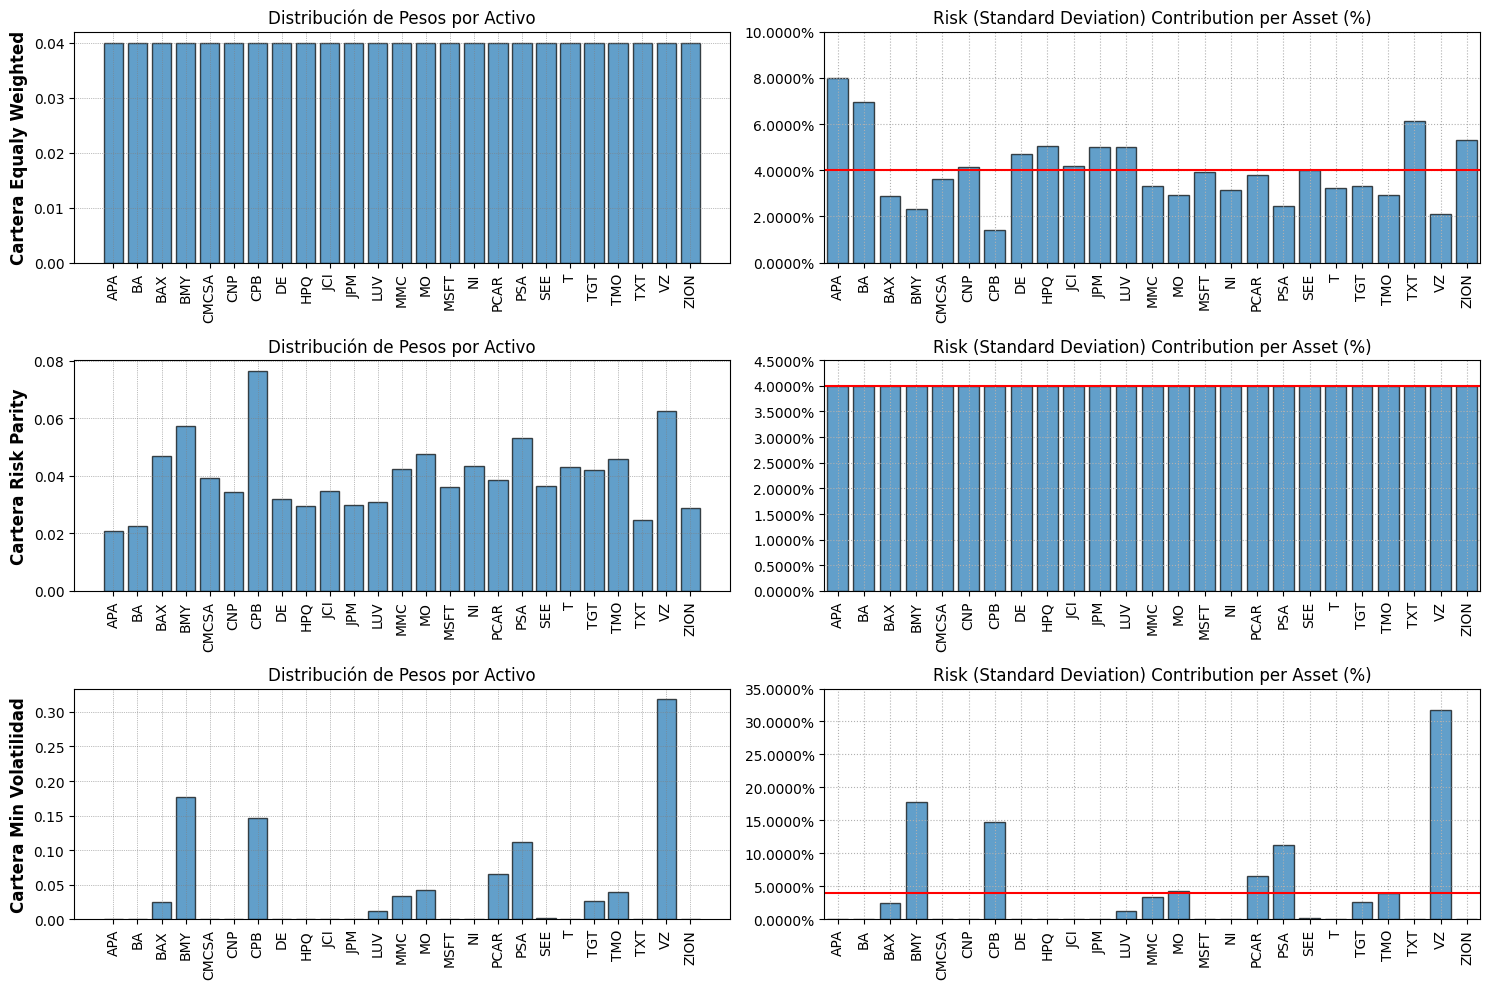

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

axs[0, 0].bar(assets, pesos_eq[0], color='tab:blue', alpha=0.7, edgecolor='black')

# Ajustando las etiquetas del eje X para que estén verticales
axs[0, 0].set_xticks(np.arange(len(assets)))
axs[0, 0].set_xticklabels(assets, rotation=90)

# Añadiendo la cuadrícula con líneas de puntos en gris
axs[0,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Añadiendo títulos y etiquetas
axs[0, 0].set_title('Distribución de Pesos por Activo')
axs[0, 0].set_ylabel('Cartera Equaly Weighted', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_eq,
                      cov=Sigma,
                      returns=returns,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[0, 1])

#axs[0,0].set_title('Cartera Risk Parity', fontsize=16, fontweight='bold', loc='left')

axs[1, 0].bar(assets, pesos_rp.values[:,0], color='tab:blue', alpha=0.7, edgecolor='black')

# Ajustando las etiquetas del eje X para que estén verticales
axs[1, 0].set_xticks(np.arange(len(assets)))
axs[1, 0].set_xticklabels(assets, rotation=90)

# Añadiendo la cuadrícula con líneas de puntos en gris
axs[1,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Añadiendo títulos y etiquetas
axs[1, 0].set_title('Distribución de Pesos por Activo')
axs[1, 0].set_ylabel('Cartera Risk Parity', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_rp,
                      cov=Sigma,
                      returns=returns,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[1, 1])



axs[2, 0].bar(assets, pesos_min_df[0], color='tab:blue', alpha=0.7, edgecolor='black')

# Ajustando las etiquetas del eje X para que estén verticales
axs[2, 0].set_xticks(np.arange(len(assets)))
axs[2, 0].set_xticklabels(assets, rotation=90)

# Añadiendo la cuadrícula con líneas de puntos en gris
axs[2,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Añadiendo títulos y etiquetas
axs[2, 0].set_title('Distribución de Pesos por Activo')
axs[2, 0].set_ylabel('Cartera Min Volatilidad', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_min_df,
                      cov=Sigma,
                      returns=returns,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[2, 1])

## Risk Parity con categorías

Para construir una cartera equilibrada, primero asignamos el riesgo entre diferentes categorías de activos basándonos en nuestros objetivos y tolerancia al riesgo.

Luego, dentro de cada categoría, aplicamos el principio de paridad de riesgo para asegurar que cada activo contribuya de manera equitativa al riesgo total de esa categoría.

Este enfoque nos permite maximizar la diversificación y gestionar eficientemente el riesgo, creando una cartera resiliente que equilibra el riesgo y el retorno según nuestras metas de inversión.

En nuestro caso, supongamos que:

- Los 12 primeros activos son de la industria de la tecnología y queremos invertir más en ellos

- Los siguientes activos hasta el 20 son bancos y queremos invertir menos

- Los últimos son del sector consumo y queremos invertir más que en banca pero menos que en tecnología.

Esto lo implementamos usando el límite de contribusión que es la variable **b**

In [106]:
# Custom Target Contribution
b = np.ones((n,1))
b[:12] = 4      
b[12:20] = 2.5
b[20:] = 3.5
b = b/b.sum()

In [107]:
T, n = returns.shape

Sigma = returns.cov().to_numpy()
mu = returns.mean().to_numpy().reshape(-1,1)
R = returns.to_numpy()
alpha = 0.05

In [108]:
y = cp.Variable((n,1))
k = cp.Variable(nonneg=True)
t = cp.Variable()
ui = cp.Variable((T, 1))

risk = t + cp.sum(ui)/(alpha * T) # CVaR
ret = mu.T @ y

constraints = [cp.sum(y) == k,
               y >= 0,
               -R @ y - t - ui <= 0, # Linear constraint of CVaR
               ui >= 0, # Linear constraint of CVaR
               b.T @ cp.log(y) >= 1, # assume c=1
               ]

objective = cp.Minimize(risk * 1000)
prob = cp.Problem(objective, constraints)
prob.solve(solver='MOSEK')

weights = pd.DataFrame(y.value/k.value, index=assets)
print(weights)

             0
APA    2.5122%
BA     2.8565%
BAX    5.7768%
BMY    7.2178%
CMCSA  4.7782%
CNP    4.5815%
CPB   10.6164%
DE     3.9275%
HPQ    3.5736%
JCI    3.9413%
JPM    3.7206%
LUV    3.7419%
MMC    2.7488%
MO     3.1053%
MSFT   2.2384%
NI     2.9579%
PCAR   2.3465%
PSA    3.4526%
SEE    2.0833%
T      2.6746%
TGT    4.3873%
TMO    4.7993%
TXT    2.4639%
VZ     6.5012%
ZION   2.9967%


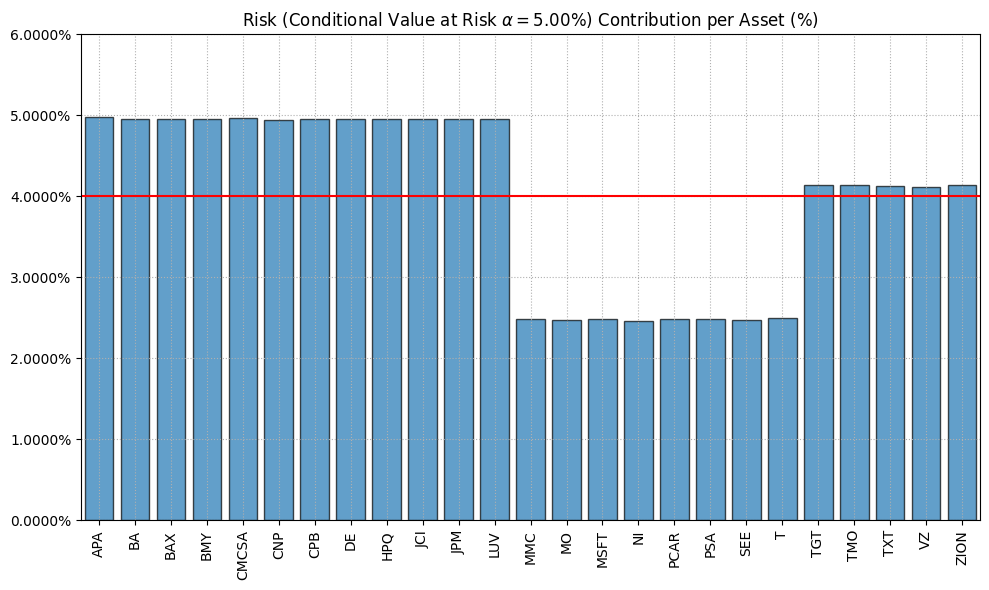

In [112]:
ax = rp.plot_risk_con(w=weights,
                      cov=Sigma,
                      returns=returns,
                      rm='CVaR',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=None)

## Risk Parity: Aproximación Budget Constraint

Basado en el paper de [Spinu 2013](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2297383)

In [113]:
T, n = returns.shape

Sigma = returns.cov().to_numpy()
mu = returns.mean().to_numpy().reshape(-1,1)
R = returns.to_numpy()
alpha = 0.05


In [114]:
b = np.ones((n,1))/n
y = cp.Variable((n,1))
k = cp.Variable(nonneg=True)
g = cp.Variable() #Standard Deviation


In [115]:
risk = g
ret = mu.T @ y

constraints = [ cp.sum(y) == k,
              y >= 0,
              cp.SOC(g, sqrtm(Sigma) @ y),
              b.T @ cp.log(y) >= 1,  #assume c=1
             ]


objective = cp.Minimize(risk)

prob = cp.Problem(objective, constraints)
prob.solve(solver='MOSEK')

weights = pd.DataFrame(y.value/k.value, index=assets)
print(weights)

            0
APA   2.0715%
BA    2.2551%
BAX   4.6945%
BMY   5.7368%
CMCSA 3.9324%
CNP   3.4539%
CPB   7.6431%
DE    3.1914%
HPQ   2.9659%
JCI   3.4866%
JPM   2.9826%
LUV   3.0800%
MMC   4.2520%
MO    4.7443%
MSFT  3.5973%
NI    4.3395%
PCAR  3.8508%
PSA   5.3287%
SEE   3.6441%
T     4.3192%
TGT   4.1981%
TMO   4.6044%
TXT   2.4837%
VZ    6.2597%
ZION  2.8846%


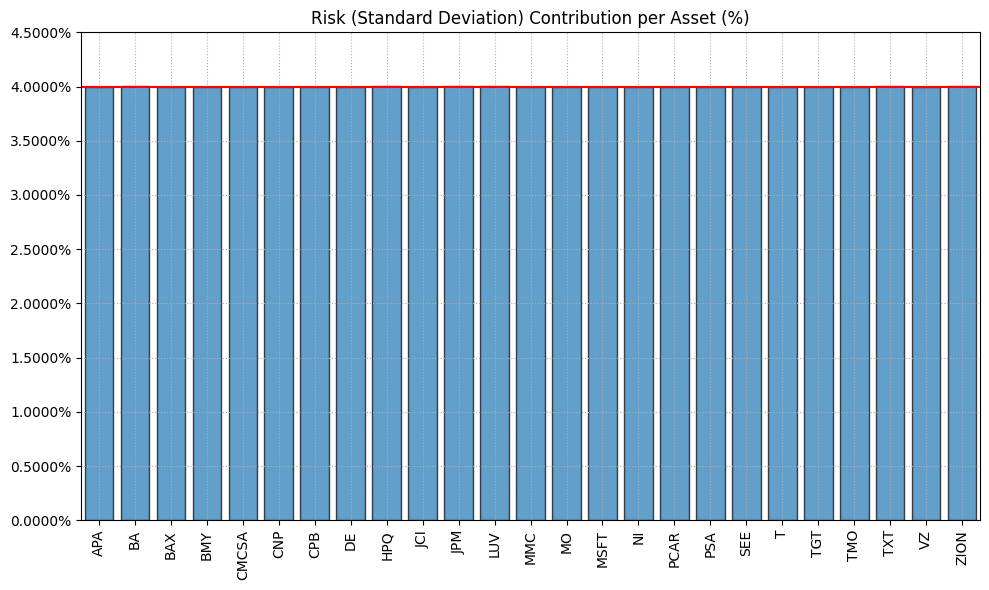

In [116]:
ax = rp.plot_risk_con(w=weights,
                      cov=Sigma,
                      returns=returns,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=None)

In [118]:
Sigma.shape, weights[0].shape

((25, 25), (25,))

In [119]:
weights[0] @ Sigma @ weights[0]

0.0001461369788822031

In [120]:
Sigma @ weights[0]

array([2.82120320e-04, 2.59242895e-04, 1.24508554e-04, 1.01889423e-04,
       1.48641106e-04, 1.69236377e-04, 7.64886593e-05, 1.83182031e-04,
       1.97124930e-04, 1.67650846e-04, 1.96016732e-04, 1.89819336e-04,
       1.37468661e-04, 1.23202239e-04, 1.62486593e-04, 1.34692405e-04,
       1.51792432e-04, 1.09691511e-04, 1.60401308e-04, 1.35327860e-04,
       1.39230462e-04, 1.26945030e-04, 2.35395116e-04, 9.33772887e-05,
       2.02683089e-04])

/tmp/ipykernel_36800/1431061665.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


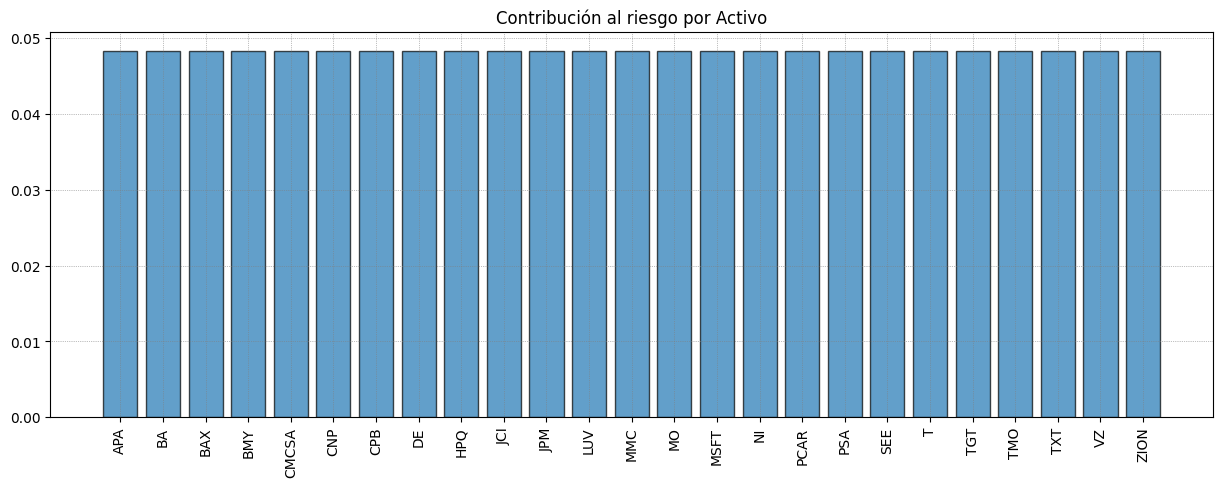

In [137]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(assets, 100*risk_contrib(weights[0], Sigma), color='tab:blue', alpha=0.7, edgecolor='black')

# Ajustando las etiquetas del eje X para que estén verticales
ax.set_xticks(np.arange(len(assets)))
ax.set_xticklabels(assets, rotation=90)

# Añadiendo la cuadrícula con líneas de puntos en gris
ax.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Añadiendo títulos y etiquetas
ax.set_title('Contribución al riesgo por Activo')
#axs[0, 0].set_ylabel('Cartera Equaly Weighted', fontsize=12, fontweight='bold')
fig.show()

## PRINCIPALES DIFERENCIAS ENTRE CARTERAS RISK BUDGET Y MEAN VARIANCE

Este apartado se basa en el paper [Bruder et all, 2012](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2009778)

Vamos a analizar las principales diferencias entre lo  dos enfoques predominantes en este ámbito son las carteras basadas en la **Optimización de Riesgos (RB)** y las carteras **Optimizadas en Media-Varianza (MVO)**. A continuación, se ofrece una breve descripción de cada uno:

* **Carteras Optimizadas en Media-Varianza (MVO)**

Las carteras MVO, basadas en la teoría de cartera moderna propuesta por Harry Markowitz, buscan optimizar la combinación de activos para alcanzar el máximo retorno esperado para un nivel de riesgo dado, o minimizar el riesgo para un nivel de retorno esperado. Este enfoque se centra en la relación entre el retorno esperado de los activos y su varianza o volatilidad, utilizando la covarianza entre pares de activos para diversificar el riesgo y lo que se reparte es el capital entre los distintos activos.

* **Carteras Basadas en la Optimización de Riesgos (RB)**

Por otro lado, las carteras RB adoptan un enfoque más integral del riesgo, al no solo considerar la volatilidad de los activos individuales y su correlación, sino también al asignar un "presupuesto de riesgo" a cada activo basado en su contribución al riesgo total de la cartera. Este método busca una asignación de activos que equilibre mejor la contribución al riesgo de cada activo, considerando tanto la volatilidad marginal como el peso del activo en la cartera.

Ambos enfoques ofrecen perspectivas valiosas para la construcción de carteras, pero también presentan diferencias significativas en términos de sensibilidad a los parámetros de entrada, robustez y eficacia en diferentes contextos de inversión. A continuación, exploraremos estas diferencias en detalle.




#### Primera:

Las características de la cartera Equally Risk Contribution (ERC) se encuentra **entre la de mínima varianza y la equiponderada** como se demuestra en [Maillard et al. 2010](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1271972)

#### Segunda:

La principal diferencia qe que las **carteras MVO**, al estar contruídas basadas en un proceso de optimización, **son muy sensibles a cambios en los datos de entreada (retornos y covarianzas)**. Veamos un ejemplo:

Consideramos tres activos con las siguientes características:
- Retorno esperado de $µ_1 = 8\%, µ_2 = 8\%, µ_3 = 5\%$
- Volatilidades de $σ_1 = 20\%, σ_2 = 21\%, σ_3 = 10\%$

Asumimos que la correlación entre los retornos de los activos es uniforme e igual al 80%. Para una cartera MVO, con un objetivo de volatilidad de cartera del 15%, las asignaciones serían:
- $x_1 = 38.3\%, x_2 = 20.2\%, x_3 = 41.5\%$

En la tabla 4 más abajo presentamos cómo varían los pesos de la cartera si cambiamos ligeramente los datos de entrada:


Por ejemplo, si la correlación uniforme es del 90%, las carteras MVO y RB pasan a tener los pesos (44,6%, 8,9%, 46,5%) y (38,9%, 20,0%, 41,1%).

La cartera MVO es muy sensible a los parámetros de entrada, mientras que la cartera RB es más robusta.

En el contexto de una estrategia de inversión dinámica, es inevitable que los parámetros de entrada varíen de un período al siguiente, ya que los valores de ($µ_{t+1}, Σ_{t+1}$) serán distintos de ($µ_t, Σ_t$). Esto conlleva que **una estrategia que utilice carteras MVO tendrá un mayor volumen de transacciones y, por ende, mayores costes asociados en comparación con una que emplee carteras RB**.

<center>
    <img src="../imgs/MVOvsRB.PNG"  alt="drawing" width="600">
</center>

Fuente:  [Bruder et all, 2012](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2009778)


